# Chapter 6
## Decision Trees

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [4]:
iris = load_iris(as_frame = True)

In [5]:
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

In [6]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [7]:
from sklearn.tree import export_graphviz

In [18]:
export_graphviz(tree_clf,
               out_file = "iris_tree.dot",
               feature_names=["petal length (cm)", "petal width (cm)"],
               class_names = iris.target_names,
               rounded = True,
               filled = True)

In [21]:
from graphviz import Source

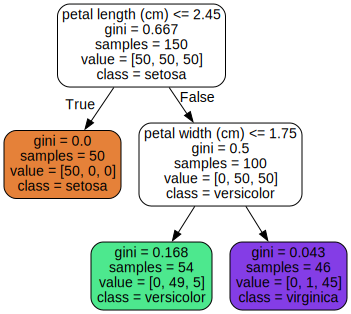

In [23]:
Source.from_file("iris_tree.dot")

In [25]:
tree_clf.predict_proba([[5,1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [27]:
tree_clf.predict([[5,1.5]])

array([1])

In [29]:
from sklearn.datasets import make_moons

In [33]:
X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

In [35]:
tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf = 5, random_state=42)
tree_clf1.fit(X_moons,y_moons)
tree_clf2.fit(X_moons,y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [37]:
X_moons_test, y_moons_test = make_moons(n_samples=100, noise=0.2, random_state=43)

In [39]:
tree_clf1.score(X_moons_test, y_moons_test)

0.89

In [41]:
tree_clf2.score(X_moons_test, y_moons_test)

0.92

In [43]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

In [55]:
np.random.seed(42)
X_quad = np.random.rand(200,1) - 0.5
y_quad = X_quad**2 + 0.025 * np.random.randn(200, 1)

In [57]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state = 42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [59]:
export_graphviz(tree_reg,
               out_file = "Regressor_tree.dot",
               feature_names=["X"],
               class_names = ["y"],
               rounded = True,
               filled = True)

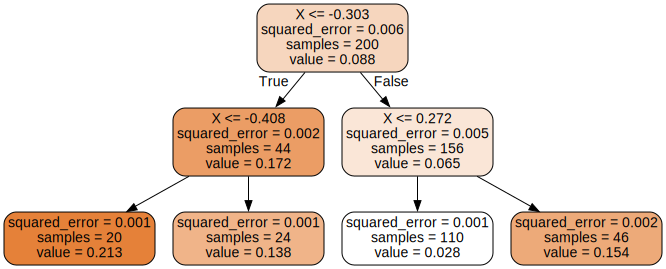

In [61]:
Source.from_file("Regressor_tree.dot")

In [63]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [67]:
pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

<hr>